In [2]:
import h5py
import numpy as np
from PIL import Image
import PIL
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
PIL.Image.MAX_IMAGE_PIXELS = None

# Open the TIFF file
tiff_path = 'data/data/QB02_20120729152314.tif'
img = Image.open(tiff_path)

# Save as PNG
png_path = 'data/data/original_WV01_20120802153817.png'
img.save(png_path, 'PNG')

In [4]:
f.close()

NameError: name 'f' is not defined

In [6]:
PIL.Image.MAX_IMAGE_PIXELS = None
tile_side = 256

# Open the input image
image = Image.open("data/data/orig_png_files/original_WV01_20120802153816.png")
#fracture_image = Image.open("fracture_image.png")
#stream_image = Image.open("stream_image.png")

img_width, img_height = image.size
print(img_width, img_height)
#print(fracture_image.size)
#print(stream_image.size)

# Calculate the size of each piece
cols = (img_width + tile_side - 1) // tile_side
rows = (img_height + tile_side - 1) // tile_side
print(cols, rows)
#rows = 172
#cols = 165

#total_tiles = 20030
total_tiles = 16496
#total_tiles = 4197


padded_width = cols * tile_side
padded_height = rows * tile_side
padded_image = Image.new("L", (padded_width, padded_height), (0))
#padded_fracture = Image.new("L", (padded_width, padded_height), (0))
#padded_stream = Image.new("L", (padded_width, padded_height), (0))

padded_image.paste(image, (0, 0))
print(padded_image.size)

#padded_fracture.paste(fracture_image, (0, 0))
#padded_stream.paste(stream_image, (0, 0))

with h5py.File('data/data/datasets/entire_WV01_20120802153816.h5', 'w') as f:
    
    images = f.create_dataset('images', (total_tiles, tile_side, tile_side), dtype='float32')
    #fractures = f.create_dataset('fractures', (total_tiles, tile_side, tile_side), dtype='float32')
    #streams = f.create_dataset('streams', (total_tiles, tile_side, tile_side), dtype='float32')
    ids = f.create_dataset('ids', (total_tiles, 2), dtype='float32')
    
    idx = 0
    for i in range(rows):
        for j in range(cols):
            # Calculate the boundaries of the piece
            left = j * tile_side
            upper = i * tile_side
            right = left + tile_side
            lower = upper + tile_side

            # Crop the piece from the original image
            img_tile = np.array(padded_image.crop((left, upper, right, lower)))/ 255.0
            #fracture_tile = np.array(padded_fracture.crop((left, upper, right, lower)))/ 255.0
            #stream_tile = np.array(padded_stream.crop((left, upper, right, lower)))/ 255.0
            #img_tile = np.array(image.crop((left, upper, right, lower)))/ 255.0
            #fracture_tile = np.array(fracture_image.crop((left, upper, right, lower)))/ 255.0
            #stream_tile = np.array(stream_image.crop((left, upper, right, lower)))/ 255.0\
            
            if np.mean(img_tile) != 0:
                images[idx] = img_tile
                #fractures[idx] = fracture_tile
                #streams[idx] = stream_tile
                ids[idx] = [i, j]
                idx += 1
    print(idx)


39725 34054
156 134
(39936, 34304)
16496


In [ ]:
### SEARCH FOR PARTICULAR TILES ###
PIL.Image.MAX_IMAGE_PIXELS = None
tile_side = 256
image = Image.open("original_image.png")
    

In [ ]:

i = 35
j = 12

left = j * tile_side
upper = i * tile_side
right = left + tile_side
lower = upper + tile_side

img_tile = np.array(image.crop((left, upper, right, lower)))/ 255.0
plt.figure(figsize = (5,5))
plt.imshow(img_tile, cmap = "gray")

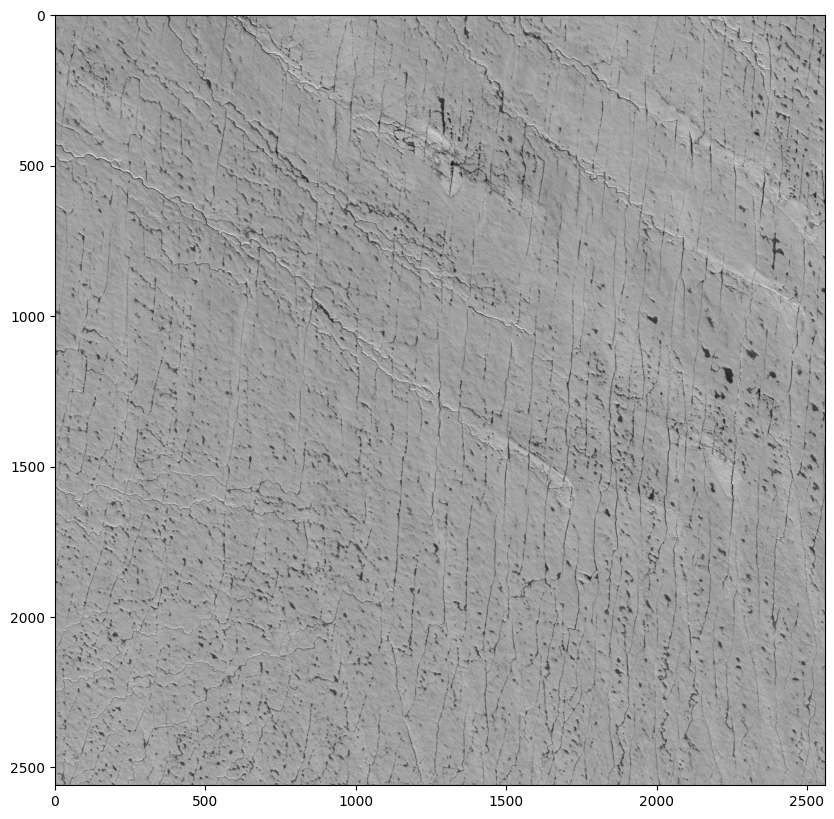

In [5]:
PIL.Image.MAX_IMAGE_PIXELS = None
original = Image.new('L', (2560, 2560))

with h5py.File('data/data/datasets/small_chunk_dataset.h5', 'r') as f:
    images = f['images'][:]
    ids = f['ids'][:]
    for i in range(len(ids)):
        c = ids[i][1]
        r = ids[i][0]
        image = Image.fromarray(images[i]*255)
        x = int(c * 256)   - 3072
        y = int(r * 256)- 8960
        original.paste(image, (x, y))
    
plt.figure(figsize = (10,10))
plt.imshow(original, cmap = "gray")

#output_path = "data/data/maps_from_models/original_image.png"
#original.save(output_path)


In [ ]:
PIL.Image.MAX_IMAGE_PIXELS = None
image = Image.open("original_image.png")
image_array = np.array(image)

plt.figure(figsize=(9,9))

plt.subplot(2, 2, 1)
plt.hist(image_array.flatten(), bins=100, density=True)
plt.title("Original")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

normalized_array = image_array/255.0
plt.subplot(2, 2, 2)
plt.title("Divided by 255")
plt.hist(normalized_array.flatten(), bins=100, density=True)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

mean = float(np.mean(image_array.flatten()))
plt.subplot(2, 2, 3)
plt.title(f"Divided by Mean: {mean}")
normalized_v2 = image_array/mean
plt.hist(normalized_v2.flatten(), bins=100, density=True)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

masked_array = image_array[image_array != 0]
min = float(np.min(masked_array))
max = float(np.max(image_array))
normalized_v3 = (image_array - min)/(max - min)
plt.subplot(2, 2, 4)
plt.title(f"Between Min {min} and Max {max}")
plt.hist(normalized_v3.flatten(), bins=100, density=True)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.show()

In [ ]:
PIL.Image.MAX_IMAGE_PIXELS = None
image = Image.open("stream_image.png")
image_array = np.array(image)

plt.figure(figsize=(9,9))

plt.hist(image_array.flatten(), bins=100, density=True)
plt.title("Original")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

In [7]:
with h5py.File('data/data/datasets/entire_WV01_20120802153817.h5', 'r') as f:
    count = 0
    images = f['images'][:]
    i = 0
    for image in images:
        if np.mean(image) == 0:
            count += 1
        i += 1
            
print(count)

0


In [8]:
def split_hdf5_dataset(original_file, train_file, test_file, validation_file, validation_ratio, test_ratio):
    with h5py.File(original_file, 'r') as f:
        images = f['images'][:]
        fractures = f['fractures'][:]
        streams = f['streams'][:]
        ids = f['ids'][:]

    # Determine the number of samples
    num_samples = images.shape[0]

    # Shuffle the indices
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    train_val_indices, test_indices = train_test_split(indices, test_size=test_ratio, random_state=42)
    train_indices, val_indices = train_test_split(train_val_indices, test_size=validation_ratio / (1 - test_ratio), random_state=42)
    
    with h5py.File(train_file, 'w') as f_train:
        f_train.create_dataset('images', data=images[train_indices])
        f_train.create_dataset('fractures', data=fractures[train_indices])
        f_train.create_dataset('streams', data=streams[train_indices])
        f_train.create_dataset('ids', data=ids[train_indices])
    
    
    with h5py.File(test_file, 'w') as f_test:
        f_test.create_dataset('images', data=images[test_indices])
        f_test.create_dataset('fractures', data=fractures[test_indices])
        f_test.create_dataset('streams', data=streams[test_indices])
        f_test.create_dataset('ids', data=ids[test_indices])
    
    with h5py.File(val_file, 'w') as f_val:
        f_val.create_dataset('images', data=images[val_indices])
        f_val.create_dataset('fractures', data=fractures[val_indices])
        f_val.create_dataset('streams', data=streams[val_indices])
        f_val.create_dataset('ids', data=ids[val_indices])
    
original_file = '/data/data/datasets/entire_dataset_512.h5'
train_file = '/data/data/datasets/train_dataset_512.h5'
test_file = '/data/data/datasets/test_dataset_512.h5'
val_file = '/data/data/datasets/val_dataset_512.h5'
validation_ratio = 0.1
test_ratio = 0.2

# Run the function
split_hdf5_dataset(original_file, train_file, test_file, val_file, validation_ratio, test_ratio)